# Visualizing the gender gap in college degrees

In this project, I'll focus on how to use data visualization to communicate insights and tell stories. We'll start with a standard matplotlib plot and improve its appearance to better communicate the patterns we want a viewer to understand.

### Introduction to the data

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category. Let's take a closer look with some basic visualisations.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

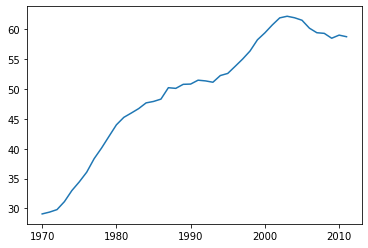

In [2]:
# Generate a line chart that visualizes the historical percentage 
# of Biology degrees awarded to women
fig, ax = plt.subplots()

plt.plot(women_degrees["Year"], women_degrees["Biology"])

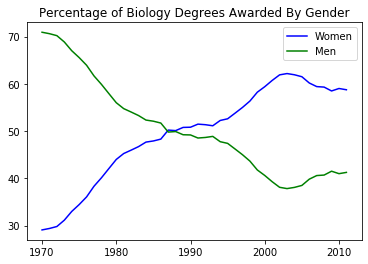

In [3]:
# include men on the same chart
fig, ax = plt.subplots()

ax.plot(women_degrees["Year"], women_degrees["Biology"], 
        color="blue", label="Women")
ax.plot(women_degrees["Year"], (100 - women_degrees["Biology"]), 
        color="green", label="Men")
ax.set_title("Percentage of Biology Degrees Awarded By Gender")
ax.legend(loc="upper right")

To improve the data-ink ratio, let's make the following changes to the plot we created in the last step:

- Remove all of the axis tick marks.
- Hide the spines, which are the lines that connects the tick marks, on each axis.

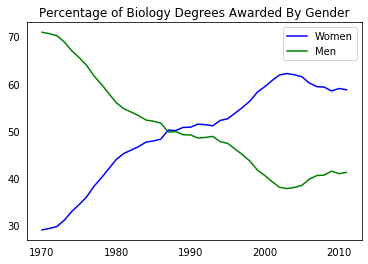

In [4]:
# remove tick parameters
fig, ax = plt.subplots()

ax.plot(women_degrees["Year"], women_degrees["Biology"], 
        color="blue", label="Women")
ax.plot(women_degrees["Year"], (100 - women_degrees["Biology"]), 
        color="green", label="Men")
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_title("Percentage of Biology Degrees Awarded By Gender")
ax.legend(loc="upper right")

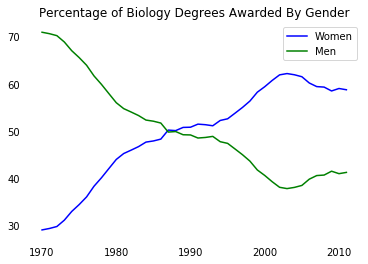

In [5]:
# remove spines
fig, ax = plt.subplots()

ax.plot(women_degrees["Year"], women_degrees["Biology"], 
        color="blue", label="Women")
ax.plot(women_degrees["Year"], (100 - women_degrees["Biology"]), 
        color="green", label="Men")
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_title("Percentage of Biology Degrees Awarded By Gender")
ax.legend(loc="upper right")

Let's generate line charts for four STEM degree categories on a grid to encourage comparison.

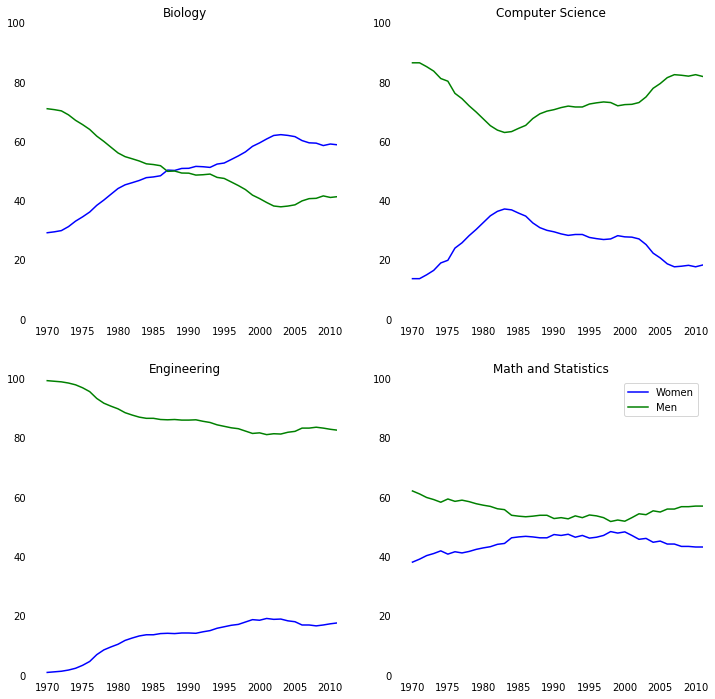

In [6]:
# create degree list
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], 
            c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], 
            c='green', label='Men')
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_title(major_cats[sp])
# Calling pyplot.legend() here will add the legend to the 
# last subplot that was created.
plt.legend(loc='upper right')

So far, we've been using the default matplotlib colors to color the lines in line charts. When selecting colors, we need to be mindful of people who have some amount of color blindness. People who have color blindness have a decreased ability to distinguish between certain kinds of colors. 

The most common form of color blindness is red-green color blindness, where the person can't distinguish between red and green shades. Approximately 8% of men and 0.5% of women of Northern European descent suffer from red-green color blindness.

Let's adjust the color scheme to the color blind pallete.

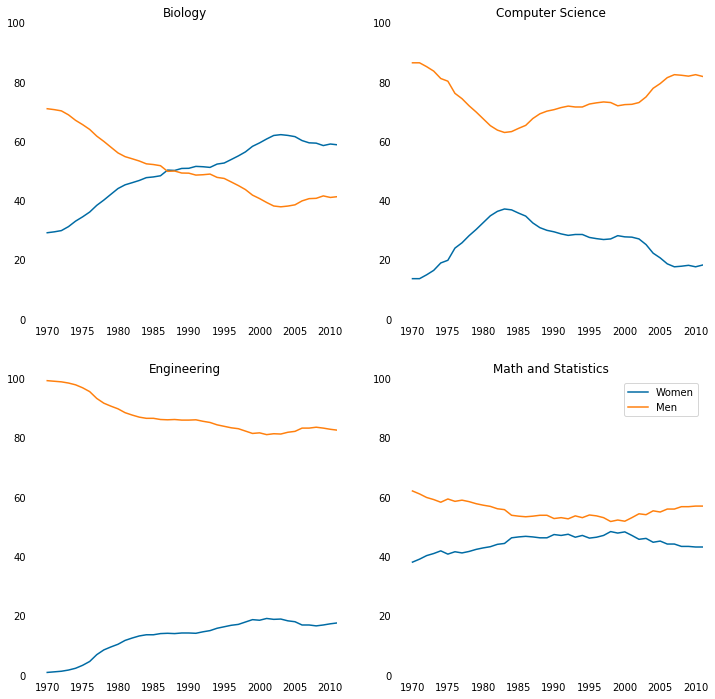

In [7]:
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # The color for each line is assigned here.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], 
            c=(0/255, 107/255, 164/255), label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], 
            c=(255/255, 128/255, 14/255), label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc='upper right')

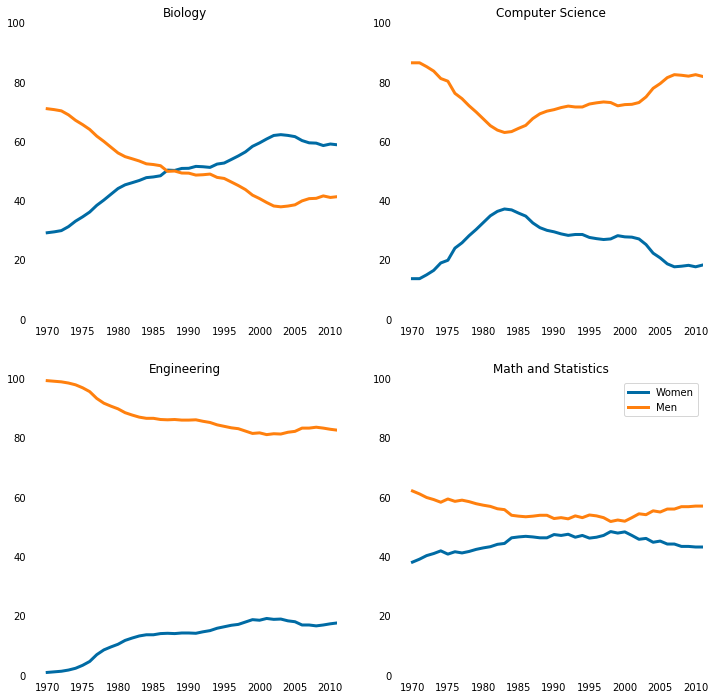

In [8]:
# increase the linewidth
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # The color for each line is assigned here.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], 
            c=(0/255, 107/255, 164/255), label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], 
            c=(255/255, 128/255, 14/255), label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc='upper right')

If we wanted to visualize all six STEM degrees, we'd need to either add a new column or a new row. Unfortunately, neither solution orders the plots in a beneficial way to the viewer. By scanning horizontally or vertically, a viewer isn't able to learn any new information and this can cause some frustration as the viewer's gaze jumps around the image.

To make the viewing experience more coherent, we can:

- use layout of a single row with multiple columns
- order the plots in decreasing order of initial gender gap

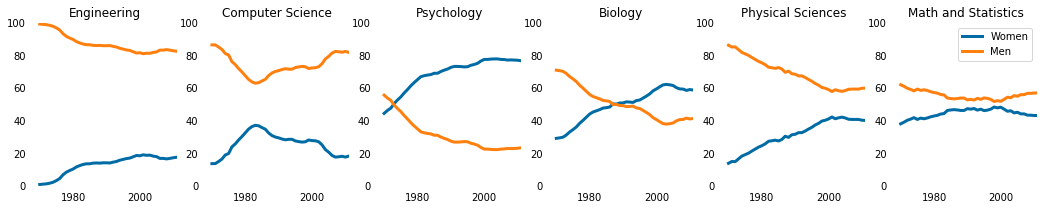

In [9]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
cb_grey = (171/255, 171/255, 171/255)

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], 
            c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], 
            c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc='upper right')

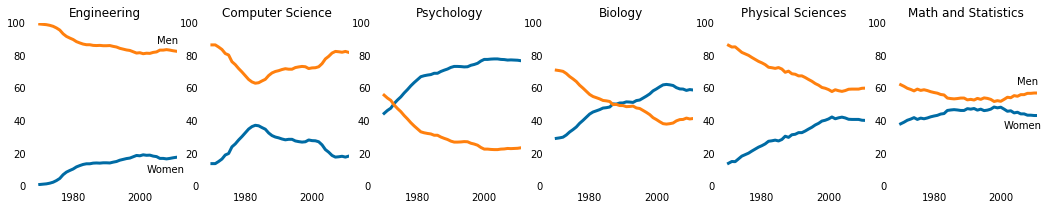

In [10]:
# add text annotations
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], 
            c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], 
            c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if sp == 0:
        ax.text(2005, 87, "Men")
        ax.text(2002, 8, "Women")
    elif sp == 5:
        ax.text(2005, 62, "Men")
        ax.text(2001, 35, "Women")

Because there are seventeen degrees that we need to generate line charts for, we'll use a subplot grid layout of 6 rows by 3 columns. We can then group the degrees into STEM, liberal arts, and other, in the following way:

In [16]:
# group degree types
stem_cats = ["Psychology", "Biology", "Math and Statistics", "Physical Sciences", "Computer Science", "Engineering"]
lib_arts_cats = ["Foreign Languages", "English", "Communications and Journalism", "Art and Performance", "Social Sciences and History"]
other_cats = ["Health Professions", "Public Administration", "Education", "Agriculture", "Business", "Architecture"]

# color blind palette
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
cb_grey = (171/255, 171/255, 171/255)

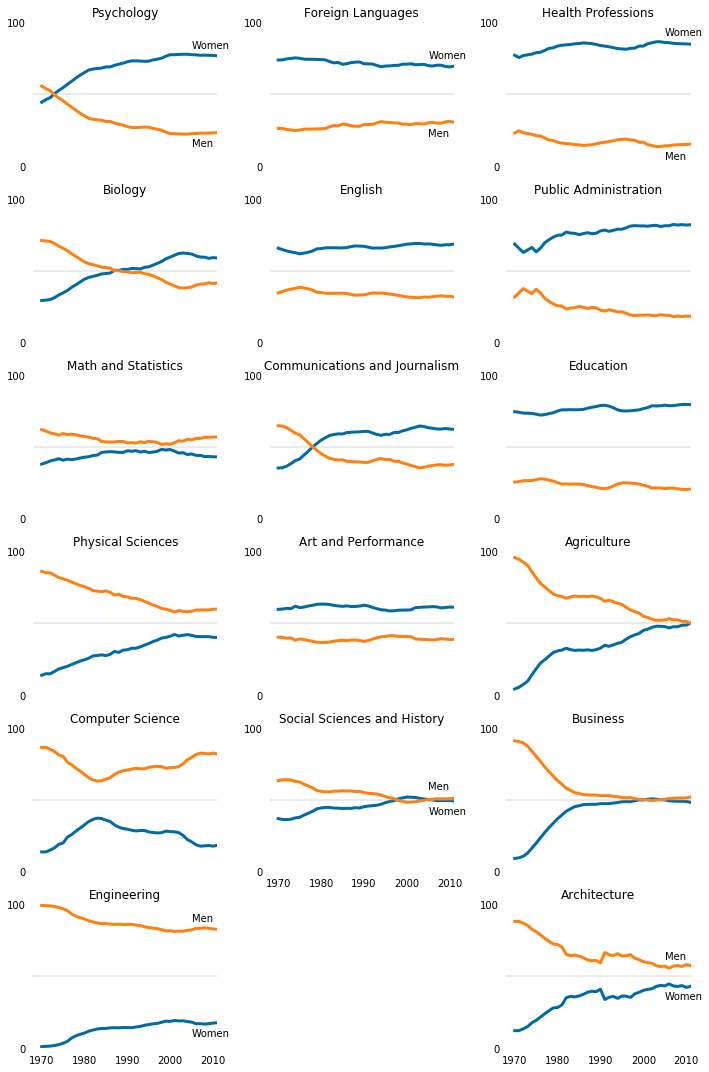

In [15]:
fig = plt.figure(figsize=(10, 15))

for sp in range(0, 18, 3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[stem_cats[cat_index]],
           color=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees["Year"], 100-women_degrees[stem_cats[cat_index]],
           color=cb_orange, linewidth=3)
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if cat_index == 0:
        ax.text(2005, 82, "Women")
        ax.text(2005, 14, "Men")
    elif cat_index == 5:
        ax.text(2005, 8, "Women")
        ax.text(2005, 88, "Men")
        ax.tick_params(labelbottom=True)
    ax.set_title(stem_cats[cat_index])
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    ax.set_yticks([0, 100])
    ax.axhline(50, color=cb_grey, alpha=0.3)

for sp in range(1, 15, 3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[lib_arts_cats[cat_index]],
           color=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees["Year"], 100-women_degrees[lib_arts_cats[cat_index]],
           color=cb_orange, linewidth=3)
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if cat_index == 0:
        ax.text(2005, 75, "Women")
        ax.text(2005, 21, "Men")
    elif cat_index == 4:
        ax.text(2005, 40, "Women")
        ax.text(2005, 57, "Men")
        ax.tick_params(labelbottom=True)
    ax.set_title(lib_arts_cats[cat_index])
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    ax.set_yticks([0, 100])
    ax.axhline(50, color=cb_grey, alpha=0.3)
    
for sp in range(2, 20, 3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6, 3, sp+1)
    ax.plot(women_degrees["Year"], women_degrees[other_cats[cat_index]],
           color=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees["Year"], 100-women_degrees[other_cats[cat_index]],
           color=cb_orange, linewidth=3)
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if cat_index == 0:
        ax.text(2005, 91, "Women")
        ax.text(2005, 5, "Men")
    elif cat_index == 5:
        ax.text(2005, 34, "Women")
        ax.text(2005, 62, "Men")
        ax.tick_params(labelbottom=True)
    ax.set_title(other_cats[cat_index])
    ax.set_ylim(0, 100)
    ax.set_xlim(1968, 2011)
    ax.set_yticks([0, 100])
    ax.axhline(50, color=cb_grey, alpha=0.3)
    
plt.tight_layout()

fig.savefig("gender_degrees.png")